In [24]:
import pandas as pd

In [25]:
data = pd.read_csv("../../data/Ana Health_Tabela Modelo Previsão Churn - Tabela.csv")

In [26]:
def column_label_to_index(col_label):
    col_index = 0
    for c in col_label.upper():
        col_index = col_index * 26 + (ord(c) - ord('A') + 1)
    return col_index - 1


def add_prefix_to_first_row(dataframe, prefix, start_col_label, end_col_label):
    start_col = column_label_to_index(start_col_label)
    end_col = column_label_to_index(end_col_label)
    for col in range(start_col, end_col + 1):
        dataframe.iat[0, col] = prefix + dataframe.iat[0, col]

In [27]:
add_prefix_to_first_row(data, 'PESSOA_PIPEDRIVE_', 'A', 'R')
add_prefix_to_first_row(data, 'FUNIL_ASSINATURA_PIPEDRIVE_', 'S', 'X')
add_prefix_to_first_row(data, 'FUNIL_ONBOARDING_PIPEDRIVE_', 'Y', 'AH')
add_prefix_to_first_row(data, 'ATENDIMENTOS_AGENDA_', 'AJ', 'AY')
add_prefix_to_first_row(data, 'WHOQOL_', 'AZ', 'BD')
add_prefix_to_first_row(data, 'COMUNICARE_', 'BE', 'BE')
add_prefix_to_first_row(data, 'TWILIO_', 'BF', 'BM')
add_prefix_to_first_row(data, 'COBRANÇA_VINDI_', 'BN', 'BU')

In [28]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

In [29]:
import missingno as msno

<Axes: xlabel='0'>

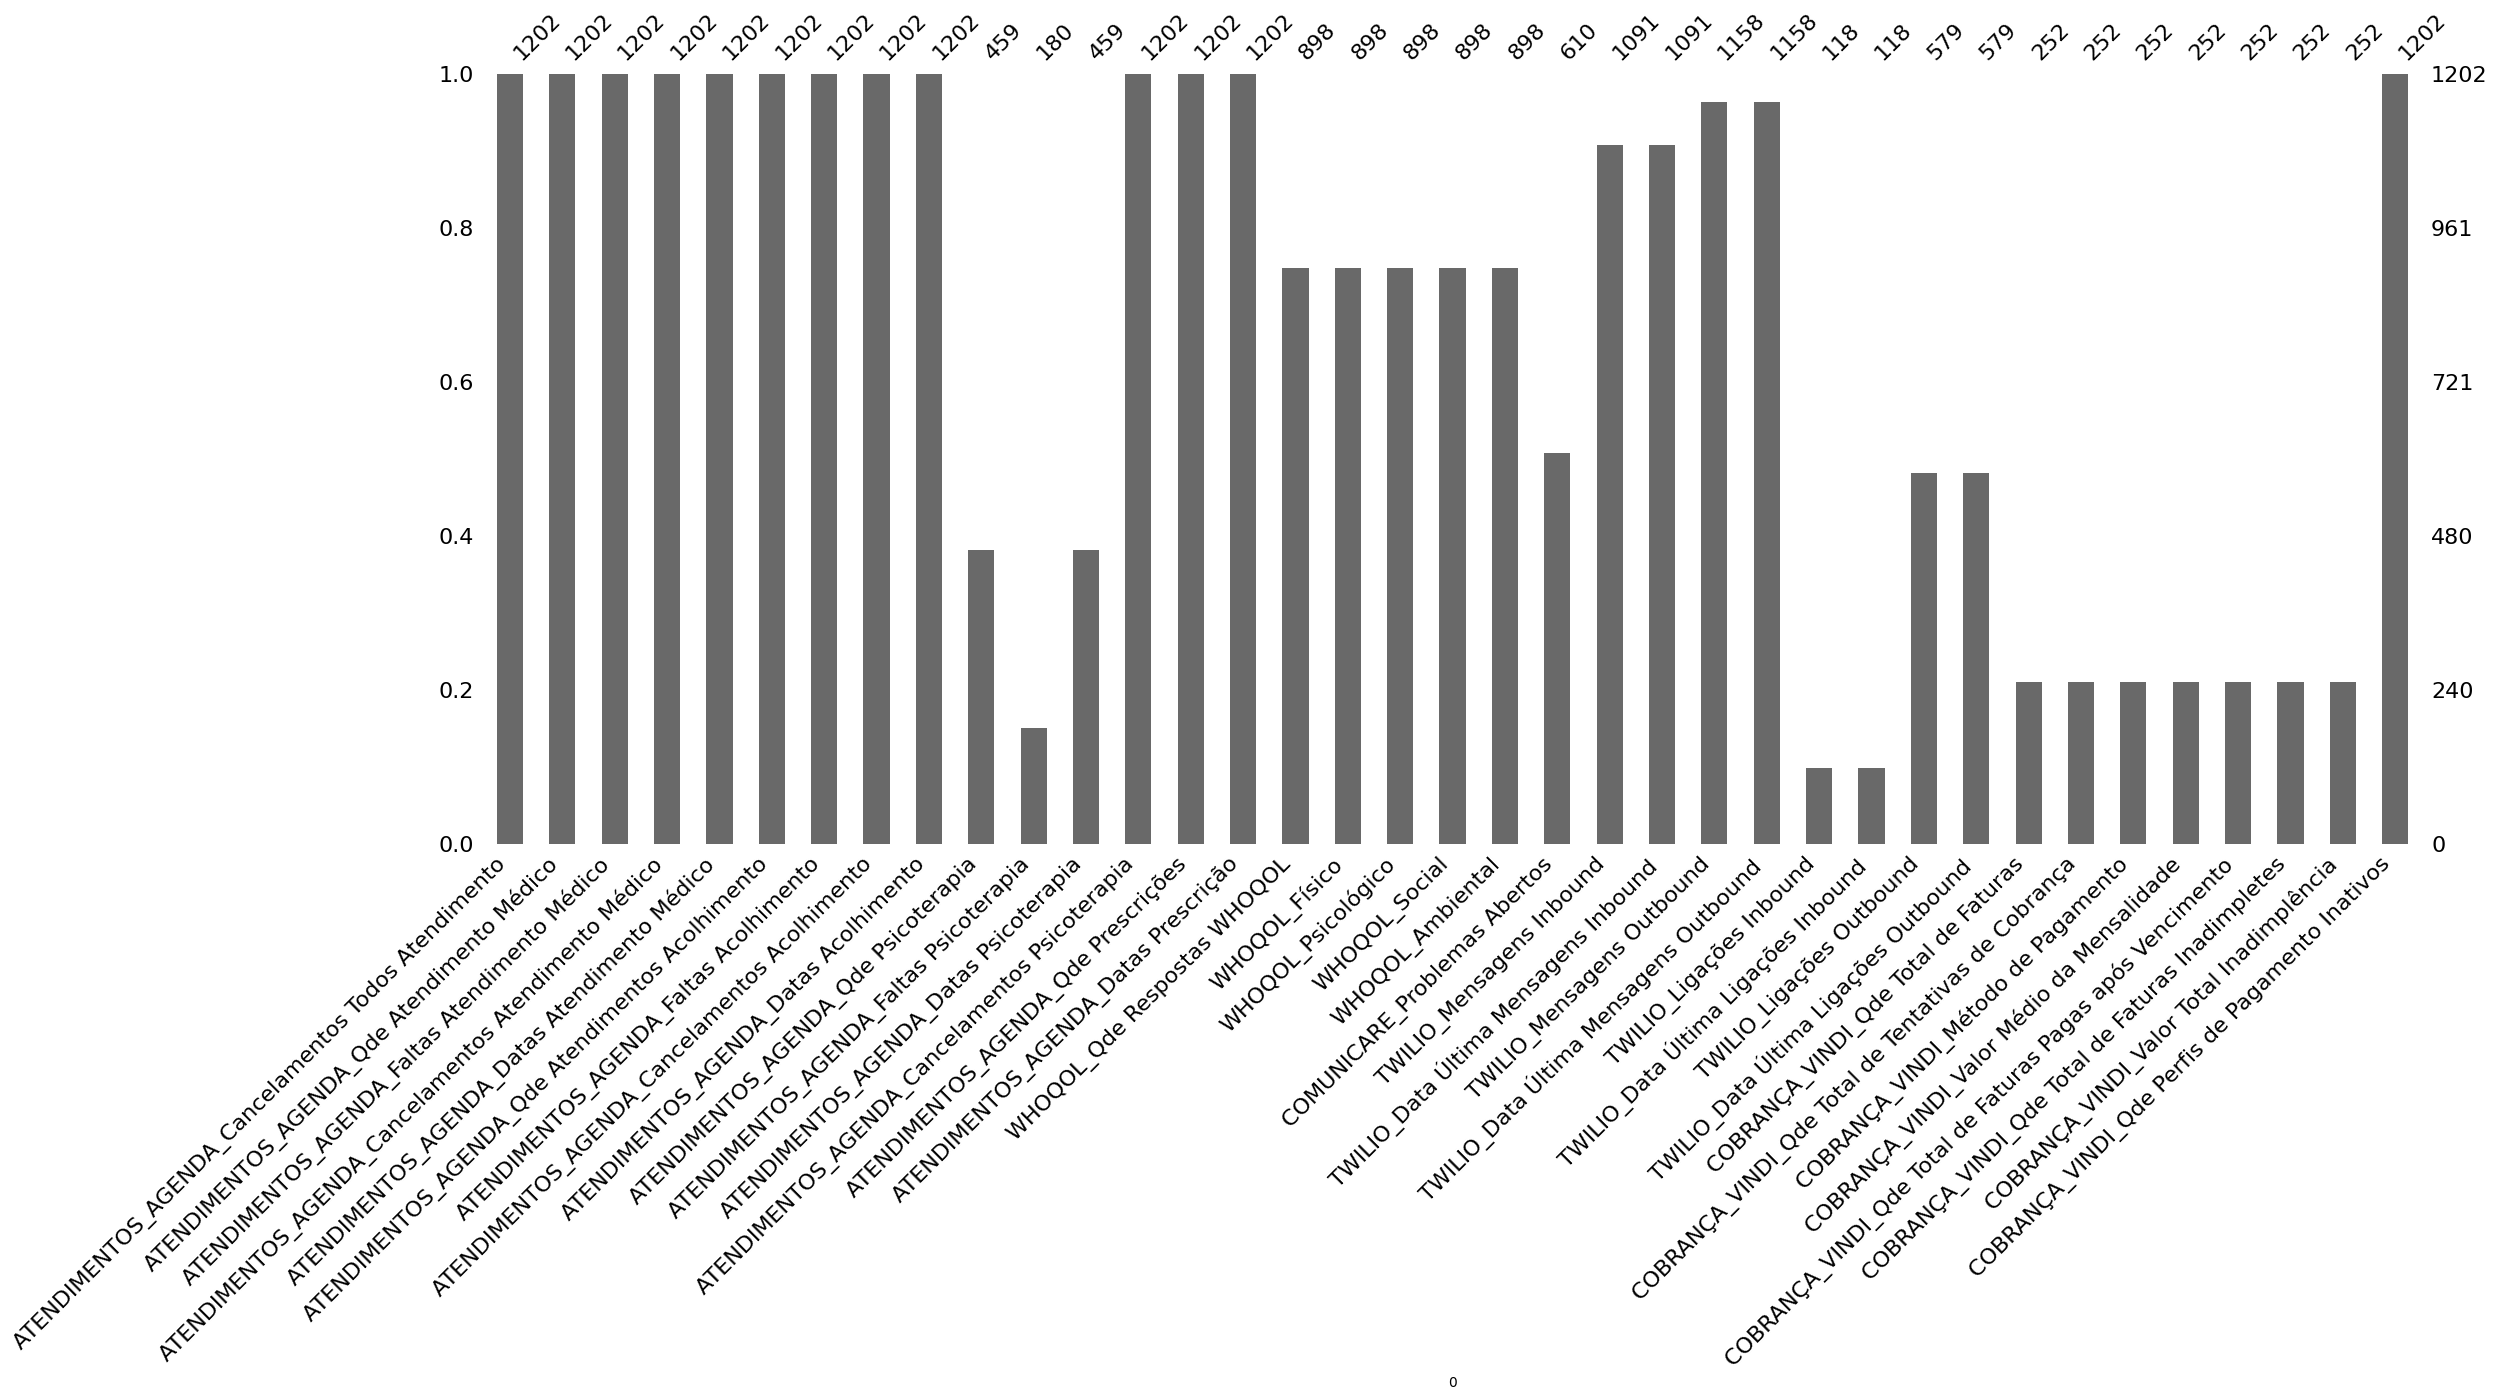

In [30]:
msno.bar(data.iloc[:,36:])

In [31]:
data_limpo = data[data['FUNIL_ASSINATURA_PIPEDRIVE_status'].isin(['won', 'lost'])]

In [32]:
data_limpo['FUNIL_ASSINATURA_PIPEDRIVE_status'].value_counts()

FUNIL_ASSINATURA_PIPEDRIVE_status
won     551
lost    450
Name: count, dtype: int64

In [33]:
data[data['FUNIL_ASSINATURA_PIPEDRIVE_status'] == 'lost']['PESSOA_PIPEDRIVE_contract_end_date']

25      2023-08-26
29      2023-08-02
31      2023-09-20
37      2021-10-01
38      2023-09-16
           ...    
1111    2023-10-24
1113    2023-10-31
1115    2023-10-25
1121    2023-09-22
1134    2023-11-01
Name: PESSOA_PIPEDRIVE_contract_end_date, Length: 450, dtype: object

In [34]:
rows_to_remove_lost = data_limpo[(data_limpo['FUNIL_ASSINATURA_PIPEDRIVE_status'] == 'lost') & (data_limpo['PESSOA_PIPEDRIVE_contract_end_date'].isnull())]

rows_to_remove_lost

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
158,1911,1984-01-04,63,80,São Paulo,São Carlos,13571-260,438,NaN,2021-12-07,...,10,2022-05-20 14:50:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
256,2286,1995-02-02,63,80,Minas Gerais,Juiz de Fora,36039-290,453,NaN,2022-02-14,...,2,2023-02-23 13:54:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
312,2410,1981-06-19,63,80,São Paulo,São Paulo,05038-040,NaN,NaN,2022-03-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
331,2430,1990-12-31,63,80,Ceará,Fortaleza,60813-620,NaN,NaN,2022-03-04,...,2,2022-03-23 10:30:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
393,2621,1989-02-28,64,80,Paraná,Curitiba,81690-200,415,NaN,2022-04-18,...,1,2022-05-04 18:32:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
443,2800,2000-06-19,64,80,São Paulo,São Paulo,05782-470,435,NaN,2022-05-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
480,2895,1989-12-18,64,82,São Paulo,São Carlos,13563-264,NaN,NaN,2022-06-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
503,3010,1985-09-25,64,80,São Paulo,Guararema,08900-000,423,NaN,2022-07-18,...,NaN,NaN,7,8,Cartão de crédito,88.00,1,0,0,FALSE
604,3292,1987-11-28,63,82,São Paulo,São Paulo,04003-000,413,NaN,2022-09-14,...,2,2022-09-29 09:45:07,6,7,Cartão de crédito,88.00,0,0,0,FALSE
613,3310,1992-02-05,64,80,Santa Catarina,Palhoça,88132-075,412,NaN,2022-09-19,...,NaN,NaN,5,6,Cartão de crédito,88.00,1,3,264.00,FALSE


In [35]:
data_limpo = data_limpo.drop(rows_to_remove_lost.index)

In [36]:
# Filtra as linhas onde a categoria é 'won' e a data de final de contrato não é nula
rows_to_remove_won = data_limpo[(data_limpo['FUNIL_ASSINATURA_PIPEDRIVE_status'] == 'won') & (~data_limpo['PESSOA_PIPEDRIVE_contract_end_date'].isnull())]

# Remove as linhas do DataFrame
data_limpo = data_limpo.drop(rows_to_remove_won.index)


In [40]:
data_limpo.shape

(974, 73)